# Avaliação : 

O objetivo deste projeto é criar um modelo em que classifica um comentário em tóxicos ou não-tóxicos. Serão avaliados diferentes aspectos neste projeto: tanto a capacidade de apresentar e interpretar informações, como o pré-processamento, treinamento e avaliação dos resultados

Library Imports

In [1]:
import pandas as pd 
import numpy as np 
# Graphics tools 
import matplotlib.pyplot as plt
import seaborn as sns
# Vader SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Metrics for analyze
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
# NLP tools
import re
import nltk
import string
import contractions
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
# For preprocecssing and nested 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
# Standard Libs 
from collections import Counter
import joblib
# Import module to Clean Data and preprocessing  
import pre_processing
import importlib
importlib.reload(pre_processing)
from pre_processing import *


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Conjunto de dados:

O conjunto de dados a ser utilizado nesta avaliação é uma sub-amostra de um conjunto de dados público disponível no Kaggle. Ele é composto por comentários da Wikipedia que foram rotulados em diferentes tipos de toxidade. O conjunto de dados foi adaptado para ter somente comentários tóxicos e não-tóxicos.


Train DataSet import 


In [3]:
train_df = pd.read_csv(r'C:\Users\Rícharde\Desktop\Python IA\Python-IA-Dell-Lead-\Final\train_binary_small.csv')
train_df.head(10)

,id,comment_text,Toxic
0,0028d62e8a5629aa,All of my edits are good. Cunts like you who ...,Toxic
1,006e87872c8b370c,you are a stupid fuck \n\nand your mother's cu...,Toxic
2,00b77cb600c897b4,"""\n\nAnd you are? Let me know when you've craw...",Toxic
3,00c0b8ed05ed7833,Fuck off\n\nYou are NOT an administrator. You ...,Toxic
4,00d7a73eb033ee5e,"Have you seen the reference to their claim, yo...",Toxic
5,011d0c0a6c8e5765,I NEVER FUCKING MADE THIS MOTHER FUCKING ARTIC...,Toxic
6,0122aba9f97885cd,There are many broken nostrils in this pancreas,Non-Toxic
7,016aa1af4fa90e8b,"""\n\nElvis... Crying in the Chapel Feudalist """,Non-Toxic
8,019ab9a91e7fcdbe,Are you fucker mother fucker have nothing to d...,Toxic
9,01ce75675a501e50,"""\\nYou wasted your own time! Take this advice...",Toxic


Test DataSet import 


In [4]:
test_df = pd.read_csv(r'C:\Users\Rícharde\Desktop\Python IA\Python-IA-Dell-Lead-\Final\test_binary_small.csv')
test_df.head(10)

,id,comment_text,Toxic
0,00091c35fa9d0465,"== Arabs are committing genocide in Iraq, but ...",Toxic
1,0013a435effa29bd,"I'd never think I'd need to say it, but Wikipe...",Non-Toxic
2,001eff4007dbb65b,"::No, he is an arrogant, self serving, immatur...",Toxic
3,008eb47c4684d190,""" \n\n So, on the tenth anniversary of 9/11, ""...",Toxic
4,00991697be5ed76a,Simple: You are stupid!,Toxic
5,00bee0148b44976e,""" \n\n Please do not vandalize pages, as you ...",Non-Toxic
6,0155d282a0ae2760,you fucking braindead oroszka 50% of the syria...,Toxic
7,0164123c08c9fcbd,""" \n :::::""""This I hate Eagles 247 for. since ...",Toxic
8,0173dd710621e443,""" \n ::Can you cite any policies? If not, why...",Toxic
9,01f731449eb8b6b3,== WIKIPEDIA IS FOR DICKSHITS LIKE U == \n\n R...,Toxic


# Data analysis:

Checking null values

In [5]:
print('Train dataset : \n',train_df.isnull().sum())

Train dataset : 
 id              0
comment_text    0
Toxic           0
dtype: int64


In [6]:
print('Train dataset : ',train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2000 non-null   object
 1   comment_text  2000 non-null   object
 2   Toxic         2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB
Train dataset :  None


Target Count 

Train dataset:

Toxic        1500
Non-Toxic     500
Name: Toxic, dtype: int64


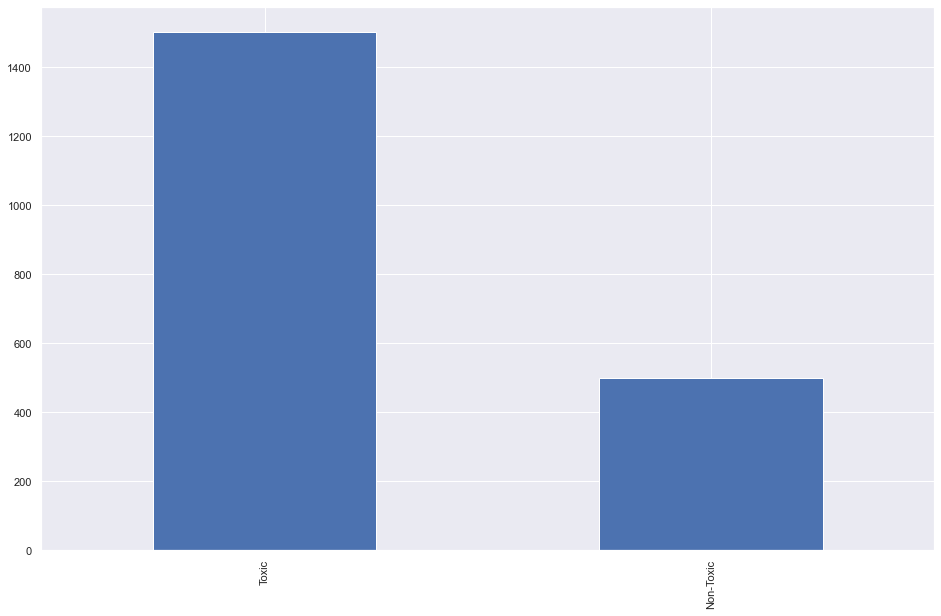

In [94]:
train_df.Toxic.value_counts().plot(kind='bar') 
print(train_df.Toxic.value_counts())

Test dataset:

Toxic        1000
Non-Toxic     500
Name: Toxic, dtype: int64


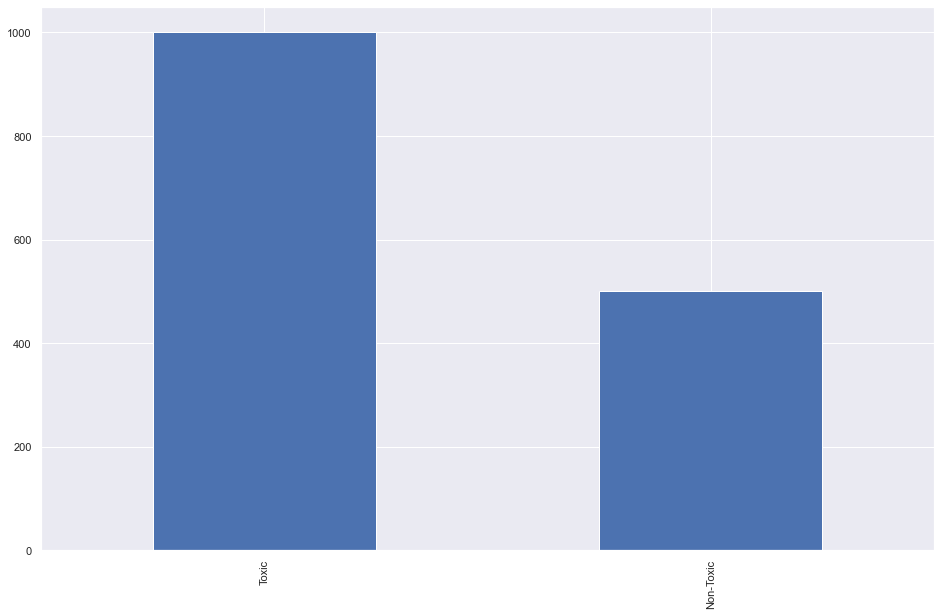

In [95]:
test_df.Toxic.value_counts().plot(kind='bar') 
print(test_df.Toxic.value_counts())

> We can see that we have unbalanced data. We have more data classified as toxic than non-toxic

Removing ID 

In [96]:
train_df.drop(columns=['id'],inplace=True)
test_df.drop(columns=['id'],inplace=True)

Train:

In [97]:
# Train dataset check 
train_df.head(10)

,comment_text,Toxic
0,All of my edits are good. Cunts like you who ...,Toxic
1,you are a stupid fuck \n\nand your mother's cu...,Toxic
2,"""\n\nAnd you are? Let me know when you've craw...",Toxic
3,Fuck off\n\nYou are NOT an administrator. You ...,Toxic
4,"Have you seen the reference to their claim, yo...",Toxic
5,I NEVER FUCKING MADE THIS MOTHER FUCKING ARTIC...,Toxic
6,There are many broken nostrils in this pancreas,Non-Toxic
7,"""\n\nElvis... Crying in the Chapel Feudalist """,Non-Toxic
8,Are you fucker mother fucker have nothing to d...,Toxic
9,"""\\nYou wasted your own time! Take this advice...",Toxic


Test:

In [98]:
# Test dataset check 
test_df.head(10)

,comment_text,Toxic
0,"== Arabs are committing genocide in Iraq, but ...",Toxic
1,"I'd never think I'd need to say it, but Wikipe...",Non-Toxic
2,"::No, he is an arrogant, self serving, immatur...",Toxic
3,""" \n\n So, on the tenth anniversary of 9/11, ""...",Toxic
4,Simple: You are stupid!,Toxic
5,""" \n\n Please do not vandalize pages, as you ...",Non-Toxic
6,you fucking braindead oroszka 50% of the syria...,Toxic
7,""" \n :::::""""This I hate Eagles 247 for. since ...",Toxic
8,""" \n ::Can you cite any policies? If not, why...",Toxic
9,== WIKIPEDIA IS FOR DICKSHITS LIKE U == \n\n R...,Toxic


Analysing duplicates

Train:

In [99]:
print('Duplicates sum :', train_df.duplicated().sum())
train_df.drop_duplicates()

Duplicates sum : 0


,comment_text,Toxic
0,All of my edits are good. Cunts like you who ...,Toxic
1,you are a stupid fuck \n\nand your mother's cu...,Toxic
2,"""\n\nAnd you are? Let me know when you've craw...",Toxic
3,Fuck off\n\nYou are NOT an administrator. You ...,Toxic
4,"Have you seen the reference to their claim, yo...",Toxic
...,...,...
1995,"""\nARE YOU FUCKING RETARDED?\n\nPlease do not ...",Toxic
1996,"Shut up, you button!",Toxic
1997,Hey alabamoy boy why dont you stick your head ...,Toxic
1998,"Walter Mercado \n\nAntonio, quite frankly, you...",Toxic


Test:

In [100]:
print('Duplicates sum :', test_df.duplicated().sum())
test_df.drop_duplicates()

Duplicates sum : 0


,comment_text,Toxic
0,"== Arabs are committing genocide in Iraq, but ...",Toxic
1,"I'd never think I'd need to say it, but Wikipe...",Non-Toxic
2,"::No, he is an arrogant, self serving, immatur...",Toxic
3,""" \n\n So, on the tenth anniversary of 9/11, ""...",Toxic
4,Simple: You are stupid!,Toxic
...,...,...
1495,This is a bit of a delayed response (what's fi...,Non-Toxic
1496,I guess what I said a few months back about th...,Toxic
1497,Baylor kids like to kill themselves,Toxic
1498,THIS IS TOM YA SOOOO AWESOME LOLOLOLOLOLOLOLOL...,Toxic


# Etapa de experimentos com diferentes modelos
#### Devem ser realizados experimentos iniciais considerando diferentes métodos de classificação para determinar o modelo mais adequado para o problema em questão:

Without preprocecssing using Vader 

> I understand that VADER was built to perform a sentiment analysis without the need for preprocessing, we will test this tool with the text as it was made available.

In [101]:
def Applying_Vader(DataFrame,colun):
    sid = SentimentIntensityAnalyzer()
    DataFrame['scores'] = DataFrame[colun].apply(lambda colun: sid.polarity_scores(colun))
    DataFrame['compound'] = DataFrame['scores'].apply(lambda scores: scores['compound'])    
    return DataFrame


In [102]:
# Applying on train df dataset
train_df = Applying_Vader(train_df,'comment_text')
train_df.head(15)

,comment_text,Toxic,scores,compound
0,All of my edits are good. Cunts like you who ...,Toxic,"{'neg': 0.19, 'neu': 0.618, 'pos': 0.193, 'com...",-0.2023
1,you are a stupid fuck \n\nand your mother's cu...,Toxic,"{'neg': 0.708, 'neu': 0.292, 'pos': 0.0, 'comp...",-0.9022
2,"""\n\nAnd you are? Let me know when you've craw...",Toxic,"{'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'comp...",-0.8225
3,Fuck off\n\nYou are NOT an administrator. You ...,Toxic,"{'neg': 0.228, 'neu': 0.772, 'pos': 0.0, 'comp...",-0.5750
4,"Have you seen the reference to their claim, yo...",Toxic,"{'neg': 0.054, 'neu': 0.946, 'pos': 0.0, 'comp...",-0.6440
5,I NEVER FUCKING MADE THIS MOTHER FUCKING ARTIC...,Toxic,"{'neg': 0.26, 'neu': 0.74, 'pos': 0.0, 'compou...",-0.8107
6,There are many broken nostrils in this pancreas,Non-Toxic,"{'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'comp...",-0.4767
7,"""\n\nElvis... Crying in the Chapel Feudalist """,Non-Toxic,"{'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'comp...",-0.6124
8,Are you fucker mother fucker have nothing to d...,Toxic,"{'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound...",-0.9186
9,"""\\nYou wasted your own time! Take this advice...",Toxic,"{'neg': 0.252, 'neu': 0.686, 'pos': 0.062, 'co...",-0.8614


Analyzing VADER result on train data frame 

In [103]:
def vader_result(DataFrame,posLabel,negLabel,label):
    DataFrame['compound_result'] = DataFrame['compound'].apply(lambda comp: posLabel if comp >=0 else negLabel)
    return classification_report(DataFrame[label],DataFrame['compound_result']), accuracy_score(DataFrame[label],DataFrame['compound_result'])

In [104]:
class_report,acc = vader_result(train_df,'Non-Toxic','Toxic','Toxic')

In [105]:
print('Accuracy Score result: ', acc)
print(class_report)

Accuracy Score result:  0.7175
              precision    recall  f1-score   support

   Non-Toxic       0.46      0.73      0.56       500
       Toxic       0.89      0.71      0.79      1500

    accuracy                           0.72      2000
   macro avg       0.67      0.72      0.68      2000
weighted avg       0.78      0.72      0.73      2000



Analyzing VADER result on test data frame 

In [106]:
# Applying on test df dataset
test_df = Applying_Vader(test_df,'comment_text')
test_df.head(15)

,comment_text,Toxic,scores,compound
0,"== Arabs are committing genocide in Iraq, but ...",Toxic,"{'neg': 0.417, 'neu': 0.542, 'pos': 0.042, 'co...",-0.9081
1,"I'd never think I'd need to say it, but Wikipe...",Non-Toxic,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",0.4767
2,"::No, he is an arrogant, self serving, immatur...",Toxic,"{'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'comp...",-0.7579
3,""" \n\n So, on the tenth anniversary of 9/11, ""...",Toxic,"{'neg': 0.241, 'neu': 0.727, 'pos': 0.032, 'co...",-0.9956
4,Simple: You are stupid!,Toxic,"{'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'comp...",-0.5707
5,""" \n\n Please do not vandalize pages, as you ...",Non-Toxic,"{'neg': 0.074, 'neu': 0.845, 'pos': 0.081, 'co...",0.0516
6,you fucking braindead oroszka 50% of the syria...,Toxic,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
7,""" \n :::::""""This I hate Eagles 247 for. since ...",Toxic,"{'neg': 0.199, 'neu': 0.801, 'pos': 0.0, 'comp...",-0.8020
8,""" \n ::Can you cite any policies? If not, why...",Toxic,"{'neg': 0.279, 'neu': 0.665, 'pos': 0.056, 'co...",-0.9788
9,== WIKIPEDIA IS FOR DICKSHITS LIKE U == \n\n R...,Toxic,"{'neg': 0.251, 'neu': 0.566, 'pos': 0.183, 'co...",-0.2960


In [107]:
class_report,acc = vader_result(train_df,'Non-Toxic','Toxic','Toxic')

In [108]:
print('Accuracy Score result: ', acc)
print(class_report)

Accuracy Score result:  0.7175
              precision    recall  f1-score   support

   Non-Toxic       0.46      0.73      0.56       500
       Toxic       0.89      0.71      0.79      1500

    accuracy                           0.72      2000
   macro avg       0.67      0.72      0.68      2000
weighted avg       0.78      0.72      0.73      2000



# Initial Pre-Processing Data to EDA


In [109]:
# Concatenating the datasets 
train_df = pd.read_csv(r'C:\Users\Rícharde\Desktop\Python IA\Python-IA-Dell-Lead-\Final\train_binary_small.csv')
test_df  = pd.read_csv(r'C:\Users\Rícharde\Desktop\Python IA\Python-IA-Dell-Lead-\Final\test_binary_small.csv')
df = train_df.append(test_df)
df.head()

C:\Users\Rícharde\AppData\Local\Temp\ipykernel_10176\160245962.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train_df.append(test_df)


,id,comment_text,Toxic
0,0028d62e8a5629aa,All of my edits are good. Cunts like you who ...,Toxic
1,006e87872c8b370c,you are a stupid fuck \n\nand your mother's cu...,Toxic
2,00b77cb600c897b4,"""\n\nAnd you are? Let me know when you've craw...",Toxic
3,00c0b8ed05ed7833,Fuck off\n\nYou are NOT an administrator. You ...,Toxic
4,00d7a73eb033ee5e,"Have you seen the reference to their claim, yo...",Toxic


Running preprocessing : 

lower case, clean text and remove extra spaces 

In [110]:
pre_proces = Pre_Processing()

def pre_processing(df,local_data):
    df[local_data] = df[local_data].apply(lambda local_data: pre_proces.expand_contractions(local_data))
    df[local_data] = df[local_data].apply(lambda local_data: pre_proces.lower_case(local_data))
    df[local_data] = df[local_data].apply(lambda local_data: pre_proces.clean_text(local_data))
    df[local_data] = df[local_data].apply(lambda local_data: pre_proces.remove_extra_spaces(local_data))
    return df 

In [111]:
df = pre_processing(df,'comment_text')

> Performing a basic pre-processing so that the data are more clear to perform the EDA. For this, I also thought it was worth joining the two data sets so that we have an overview of all the data used.

# Exploratory data analysis

Calculate the number of words 

In [112]:
def Number_Words(setence):
    return len(setence.split())

# Calculate the number of words 
df['Number Words'] = df['comment_text'].apply(lambda comment_text: Number_Words(comment_text))
df.head(10)

,id,comment_text,Toxic,Number Words
0,0028d62e8a5629aa,all of my edits are good cunts like you who re...,Toxic,56
1,006e87872c8b370c,you are a stupid fuck and your mother s cunt s...,Toxic,11
2,00b77cb600c897b4,and you are let me know when you have crawled...,Toxic,18
3,00c0b8ed05ed7833,fuck off you are not an administrator you do n...,Toxic,19
4,00d7a73eb033ee5e,have you seen the reference to their claim you...,Toxic,78
5,011d0c0a6c8e5765,i never fucking made this mother fucking artic...,Toxic,26
6,0122aba9f97885cd,there are many broken nostrils in this pancreas,Non-Toxic,8
7,016aa1af4fa90e8b,elvis crying in the chapel feudalist,Non-Toxic,6
8,019ab9a91e7fcdbe,are you fucker mother fucker have nothing to d...,Toxic,17
9,01ce75675a501e50,you wasted your own time take this advice wit...,Toxic,36


# Number of words per tweet

<AxesSubplot:xlabel='Number Words', ylabel='Count'>

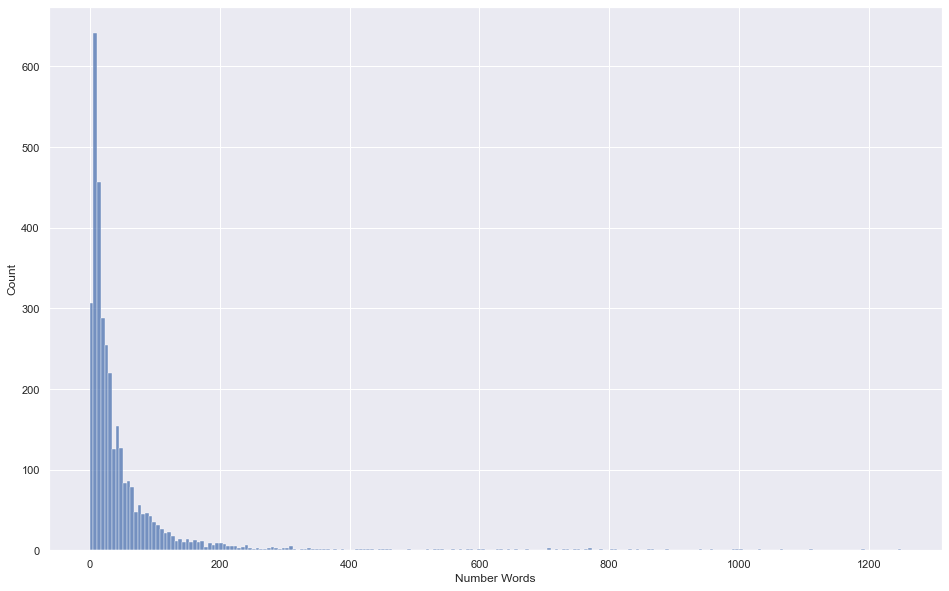

In [113]:
num_words = df['Number Words']
sns.set(rc={'figure.figsize':(16,10)})
sns.histplot(data=num_words)

> We can analyze that we have many tweets with a very small amount of characters. We can also analyze that we have few very large tweets. Something to watch out for is the presence of tweets with more than 280 characters.

# Most common words 

<AxesSubplot:xlabel='Word', ylabel='Frequency'>

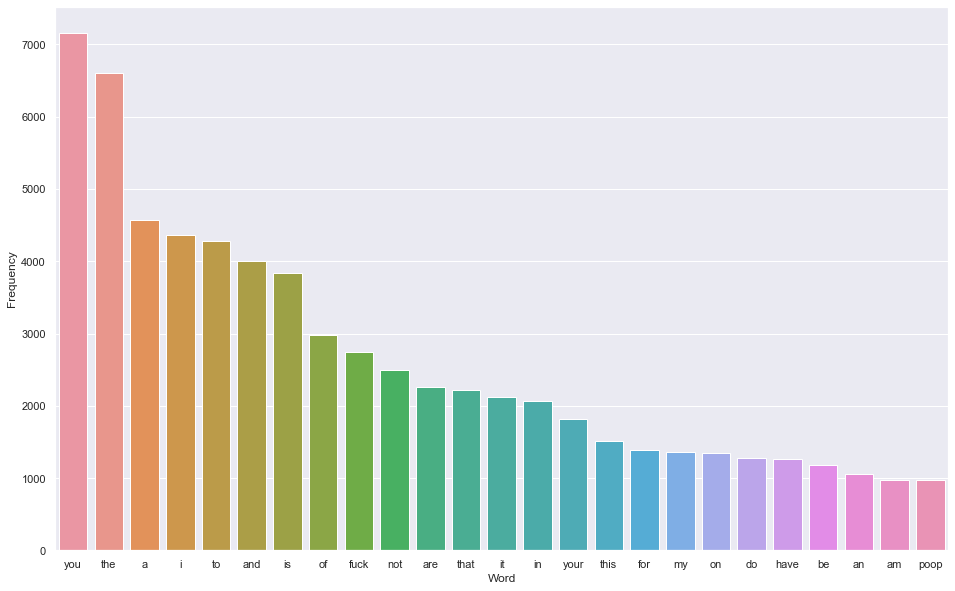

In [114]:
corpus = df['comment_text'].tolist()
word_count = Counter(" ".join(corpus).split()).most_common(25)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
sns.barplot(x="Word", y="Frequency", data=word_frequency)

> We can analyze that the vast majority of words that are repeated a lot are stopwords. However, we can see that there are a few words that are not necessarily stopwords appearing very often.

# Word Cloud 

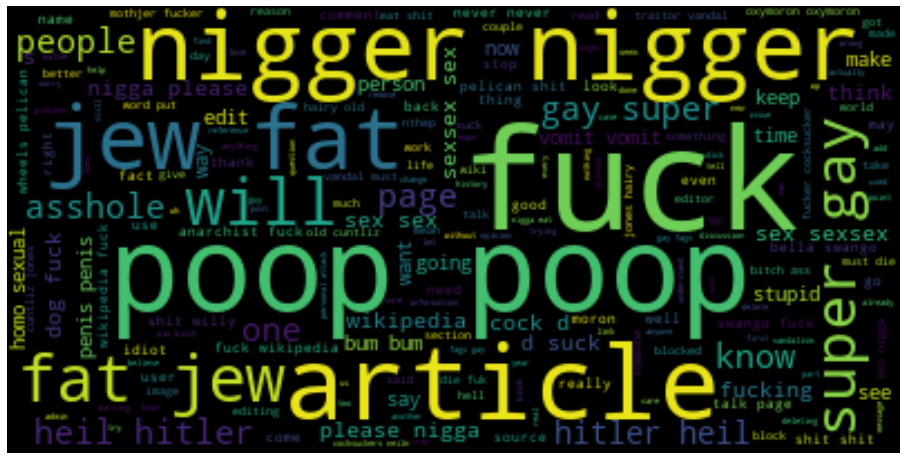

In [115]:
# Cloud WordsFor all Tweets 
corpus = df['comment_text'].tolist()
corpus_all = " ".join(corpus)

wordcloud = WordCloud().generate(corpus_all)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

>  Analyzing the dataset we can see in the word Cloud that bad words like: fuck,poop,super gay appear a lot in the text showing a very negative dataset. Words with a very positive meaning, such as good, appear very little.

# Word Cloud for positive comments

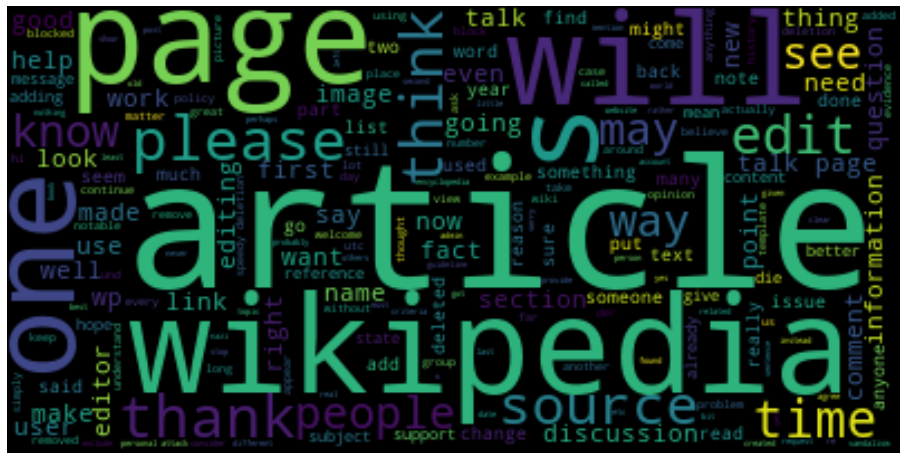

In [116]:
corpus = df[df['Toxic'] =='Non-Toxic']['comment_text'].tolist()
corpus_all = " ".join(corpus)

wordcloud = WordCloud().generate(corpus_all)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


> Analyzing the word cloud for positive comments, we can see that we have practically only positive and neutral words showing a good classification of the data.

# Word Cloud for negative comments

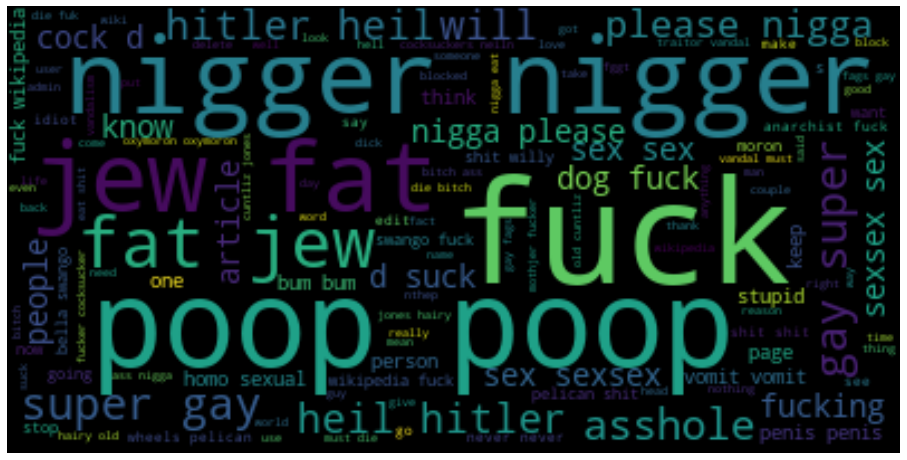

In [117]:
corpus = df[df['Toxic'] =='Toxic']['comment_text'].tolist()
corpus_all = " ".join(corpus)

wordcloud = WordCloud().generate(corpus_all)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


> As with the word cloud for positive comments, we can see that the word cloud for negative comments is pretty consistent with a lot of toxic words and few neutral or positive words.

# Running several preprocessings

In [118]:
# Basic preprocessing on train dataframe 
train_df = pre_processing(train_df,'comment_text')
test_df  = pre_processing(test_df,'comment_text')

In [119]:
train_df.head()

,id,comment_text,Toxic
0,0028d62e8a5629aa,all of my edits are good cunts like you who re...,Toxic
1,006e87872c8b370c,you are a stupid fuck and your mother s cunt s...,Toxic
2,00b77cb600c897b4,and you are let me know when you have crawled...,Toxic
3,00c0b8ed05ed7833,fuck off you are not an administrator you do n...,Toxic
4,00d7a73eb033ee5e,have you seen the reference to their claim you...,Toxic


In [120]:
test_df.head()

,id,comment_text,Toxic
0,00091c35fa9d0465,arabs are committing genocide in iraq but no ...,Toxic
1,0013a435effa29bd,i would never think i would need to say it but...,Non-Toxic
2,001eff4007dbb65b,no he is an arrogant self serving immature id...,Toxic
3,008eb47c4684d190,so on the tenth anniversary of new york times...,Toxic
4,00991697be5ed76a,simple you are stupid,Toxic


Label enconding 

In [121]:
label_enconder = preprocessing.LabelEncoder()
train_df['Toxic'] = label_enconder.fit_transform(train_df['Toxic'])
test_df['Toxic'] = label_enconder.fit_transform(test_df['Toxic'])

Stop Words analysis

In [122]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [123]:
train_df['Removing StopWords'] = train_df['comment_text'].apply(lambda x: pre_proces.remove_stopwords(x,stopwords))
test_df['Removing StopWords'] = test_df['comment_text'].apply(lambda x: pre_proces.remove_stopwords(x,stopwords))

<AxesSubplot:xlabel='Word', ylabel='Frequency'>

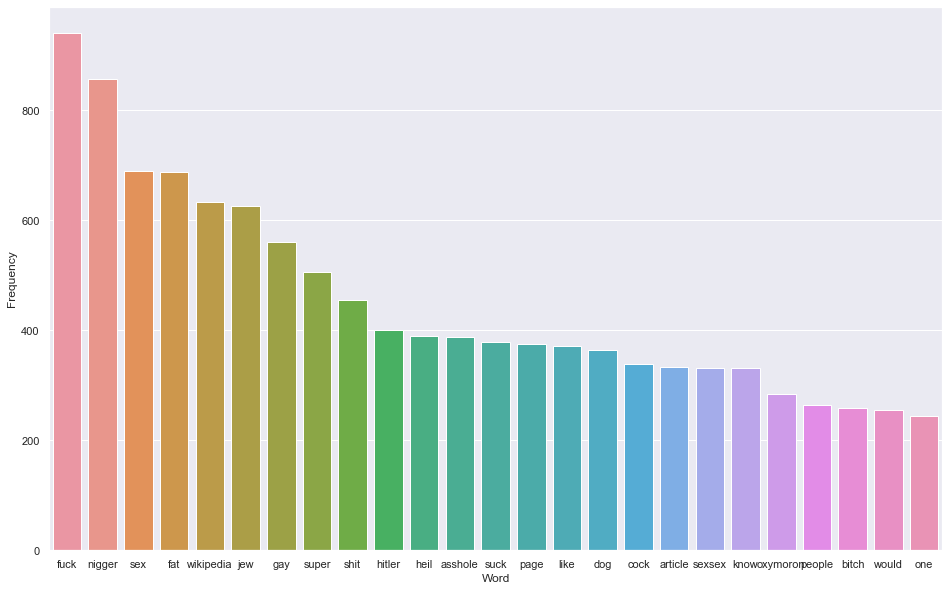

In [124]:
corpus = train_df['Removing StopWords'].tolist()
word_count = Counter(" ".join(corpus).split()).most_common(25)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
sns.barplot(x="Word", y="Frequency", data=word_frequency)

> We can analyze that the word fuck has great repetition

In [125]:
stopwords.add("fuck")

In [126]:
train_df['Removing StopWords - fuck'] = train_df['comment_text'].apply(lambda x: pre_proces.remove_stopwords(x,stopwords))
test_df['Removing StopWords - fuck'] = test_df['comment_text'].apply(lambda x: pre_proces.remove_stopwords(x,stopwords))

<AxesSubplot:xlabel='Word', ylabel='Frequency'>

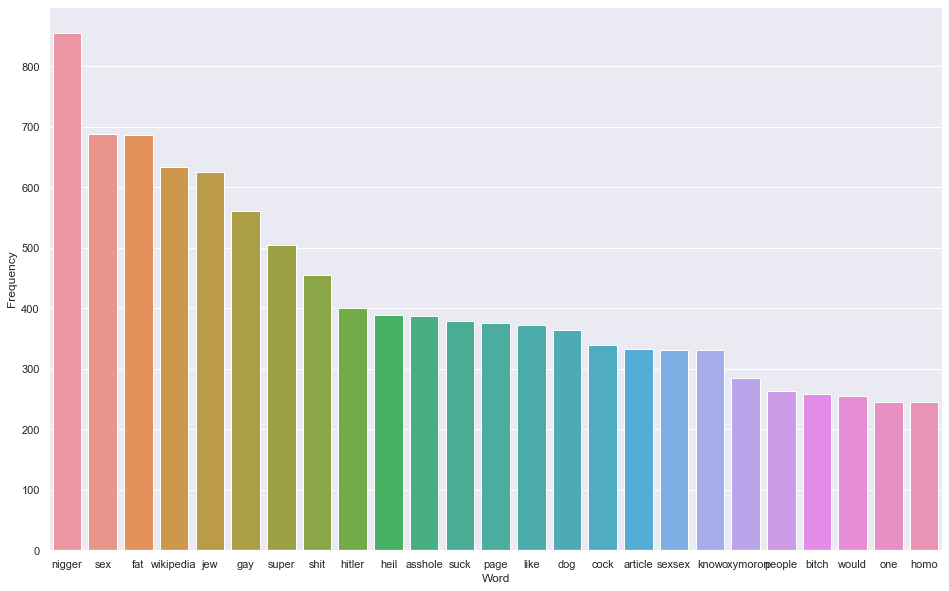

In [127]:
corpus = train_df['Removing StopWords - fuck'].tolist()
word_count = Counter(" ".join(corpus).split()).most_common(25)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
sns.barplot(x="Word", y="Frequency", data=word_frequency)

In [128]:
stopwords.add("nigger")

In [129]:
train_df['Removing StopWords - nigger'] = train_df['comment_text'].apply(lambda x: pre_proces.remove_stopwords(x,stopwords))
test_df['Removing StopWords - nigger'] = test_df['comment_text'].apply(lambda x: pre_proces.remove_stopwords(x,stopwords))

<AxesSubplot:xlabel='Word', ylabel='Frequency'>

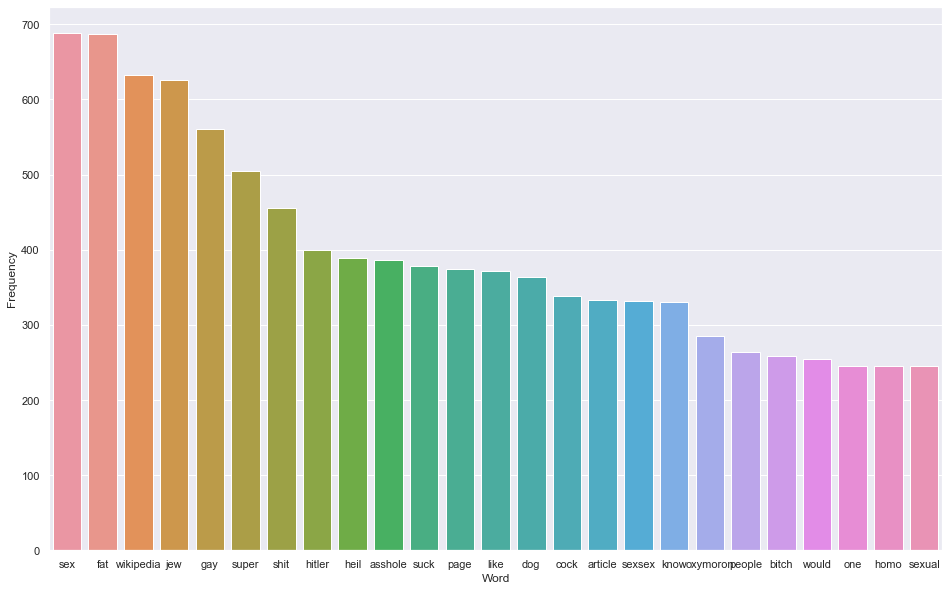

In [130]:
corpus = train_df['Removing StopWords - nigger'].tolist()
word_count = Counter(" ".join(corpus).split()).most_common(25)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
sns.barplot(x="Word", y="Frequency", data=word_frequency)

In [131]:
train_df['lemmatization'] = train_df['comment_text'].apply(lambda x: pre_proces.lemmatization(x))
train_df['stemming'] = train_df['comment_text'].apply(lambda x: pre_proces.stemming(x))
test_df['lemmatization'] = test_df['comment_text'].apply(lambda x: pre_proces.lemmatization(x))
test_df['stemming'] = test_df['comment_text'].apply(lambda x: pre_proces.stemming(x))

DataFrame result: 

In [132]:
train_df.head()

,id,comment_text,Toxic,Removing StopWords,Removing StopWords - fuck,Removing StopWords - nigger,lemmatization,stemming
0,0028d62e8a5629aa,all of my edits are good cunts like you who re...,1,edits good cunts like revert good edits stupid...,edits good cunts like revert good edits stupid...,edits good cunts like revert good edits stupid...,all of my edit be good cunt like you who rever...,all of my edits are good cunts lik you who rev...
1,006e87872c8b370c,you are a stupid fuck and your mother s cunt s...,1,stupid fuck mother cunt stinks,stupid mother cunt stinks,stupid mother cunt stinks,you be a stupid fuck and your mother s cunt stink,you are a stupid fuck and your moth s cunt stinks
2,00b77cb600c897b4,and you are let me know when you have crawled...,1,let know crawled arses dick laurent dead,let know crawled arses dick laurent dead,let know crawled arses dick laurent dead,and you be let I know when you have crawl ou...,and you are let me know when you hav crawled o...
3,00c0b8ed05ed7833,fuck off you are not an administrator you do n...,1,fuck administrator authority tell,administrator authority tell,administrator authority tell,fuck off you be not an administrator you do no...,fuck off you are not an administrator you do n...
4,00d7a73eb033ee5e,have you seen the reference to their claim you...,1,seen reference claim moron source it´s pov tim...,seen reference claim moron source it´s pov tim...,seen reference claim moron source it´s pov tim...,have you see the reference to their claim you ...,hav you seen the referenc to the claim you mor...


In [133]:
test_df.head()

,id,comment_text,Toxic,Removing StopWords,Removing StopWords - fuck,Removing StopWords - nigger,lemmatization,stemming
0,00091c35fa9d0465,arabs are committing genocide in iraq but no ...,1,arabs committing genocide iraq protests europe...,arabs committing genocide iraq protests europe...,arabs committing genocide iraq protests europe...,arab be commit genocide in iraq but no prote...,arabs are committing genocid in iraq but no pr...
1,0013a435effa29bd,i would never think i would need to say it but...,0,would never think would need say wikipedia fan...,would never think would need say wikipedia fan...,would never think would need say wikipedia fan...,I would never think I would need to say it but...,i would nev think i would need to say it but w...
2,001eff4007dbb65b,no he is an arrogant self serving immature id...,1,arrogant self serving immature idiot get right,arrogant self serving immature idiot get right,arrogant self serving immature idiot get right,no he be an arrogant self serve immature idi...,no he is an arrogant self serving immatur idio...
3,008eb47c4684d190,so on the tenth anniversary of new york times...,1,tenth anniversary new york times columnist pau...,tenth anniversary new york times columnist pau...,tenth anniversary new york times columnist pau...,so on the tenth anniversary of new york time...,so on the tenth anniversary of new york tim co...
4,00991697be5ed76a,simple you are stupid,1,simple stupid,simple stupid,simple stupid,simple you be stupid,simpl you are stupid


# testing all models with optimization, accuracy and f1-score 

Models:

KNN  
SVM_LINEAR  
BAYES  
MLP_1LAYER  
MLP_2LAYERS  
RANDOM_FOREST  

Using Nested Cross-Validation

<img src = "https://github.com/rasbt/stat451-machine-learning-fs20/raw/9e463e06a49278a3940774ef32def883e85e9cc0/L11/code/nested-cv-image.png">

In [135]:
import models
from models import* 
importlib.reload(models)

# Setting up multiple GridSearchCV objects, 1 for each algorithm
gridcvs = {}
inner_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)

for algs_name, algs in CLF_MODELS.items():
    pgrid = dict(CLF_PARAMS[algs_name].items())
    print(algs_name)
    rcv = RandomizedSearchCV(estimator=algs,
                       param_distributions=pgrid,
                       scoring='accuracy',
                       n_jobs=-1,
                       cv=inner_cv,
                       verbose=0)
    gridcvs[algs_name] = rcv

KNN
Bayes
Random_Forest
Decison Tree


Separating  and Remving ID

In [136]:
Coluns_train = train_df.drop(columns=['id'])
Coluns_test  = test_df.drop(columns=['id'])
Data = pd.merge(Coluns_train,Coluns_test, how='outer')
y = Data['Toxic']
X = Data.drop(columns=['Toxic'])

In [137]:
all_scores = {}

for name, gs_est in sorted(gridcvs.items()):

    print(50 * '-', '\n')
    print('Algorithm:', name)
    print('    Inner loop:')
    
    outer_scores_acc = []
    outer_scores_f1  = []
    outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    
    for coluns in X.columns:
        X_train = X[coluns]
        y_train = y
        print('------',coluns,'--------')
        for vectorize_name,vectorize_ in VECTORIZERS.items():
            print('------',vectorize_name,'--------')
            vec = vectorize_
            X_count = vec.fit_transform(X_train)
            
            for train_idx, valid_idx in outer_cv.split(X_count, y_train):

                approach_name = (
                f"{'pre_processed_' + coluns}__{name}__{vectorize_name}"
                )
                
                gridcvs[name].fit(X_count[train_idx].toarray(), y_train[train_idx]) # run inner loop hyperparam tuning
                F1_Score_data = f1_score(y_train[train_idx],gridcvs[name].predict(X_count[train_idx].toarray()))
                ACC_data = (gridcvs[name].best_score_ * 100)   
                scores = {
                'accuracy' :ACC_data,
                'f1' : F1_Score_data,
                'confusion_matrix' : confusion_matrix(y_train[train_idx],gridcvs[name].predict(X_count[train_idx].toarray()))
                }
                # perf on test fold (valid_idx)
                outer_scores_acc.append(gridcvs[name].best_estimator_.score(X_count[valid_idx].toarray(), y_train[valid_idx]))
                outer_scores_f1.append(f1_score(y_train[valid_idx],gridcvs[name].predict(X_count[valid_idx].toarray())))
                
                print('INFO: ', approach_name)

                dst_file = f'C:/Users/Rícharde/Desktop/Python IA/Python-IA-Dell-Lead-/Final/models/{approach_name}.pkl'
                joblib.dump(gridcvs[name],dst_file)

                all_scores.update({approach_name:{'scores':scores}})
        
    print('\n    Outer Loop:')
    
    approach_name = (
                f"{'pre_processed'}__{name}__{'mean_score_model_outer_loop'}"
                )
    print('INFO: ', approach_name)
    scores = {
        'accuracy'  :[np.mean(outer_scores_acc) * 100, np.std(outer_scores_acc) * 100],
        'f1' :[np.mean(outer_scores_f1) * 100, np.std(outer_scores_f1) * 100],
    }

    all_scores.update({approach_name:{'scores':scores}})

-------------------------------------------------- 

Algorithm: Bayes
    Inner loop:
------ comment_text --------
------ BOW --------
INFO:  pre_processed_comment_text__Bayes__BOW
INFO:  pre_processed_comment_text__Bayes__BOW
INFO:  pre_processed_comment_text__Bayes__BOW
------ TFIDF --------
INFO:  pre_processed_comment_text__Bayes__TFIDF
INFO:  pre_processed_comment_text__Bayes__TFIDF
INFO:  pre_processed_comment_text__Bayes__TFIDF
------ Removing StopWords --------
------ BOW --------
INFO:  pre_processed_Removing StopWords__Bayes__BOW
INFO:  pre_processed_Removing StopWords__Bayes__BOW
INFO:  pre_processed_Removing StopWords__Bayes__BOW
------ TFIDF --------
INFO:  pre_processed_Removing StopWords__Bayes__TFIDF
INFO:  pre_processed_Removing StopWords__Bayes__TFIDF
INFO:  pre_processed_Removing StopWords__Bayes__TFIDF
------ Removing StopWords - fuck --------
------ BOW --------
INFO:  pre_processed_Removing StopWords - fuck__Bayes__BOW
INFO:  pre_processed_Removing StopWords - fuc

c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_comment_text__Decison Tree__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_comment_text__Decison Tree__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_comment_text__Decison Tree__BOW
------ TFIDF --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_comment_text__Decison Tree__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_comment_text__Decison Tree__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_comment_text__Decison Tree__TFIDF
------ Removing StopWords --------
------ BOW --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords__Decison Tree__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords__Decison Tree__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords__Decison Tree__BOW
------ TFIDF --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords__Decison Tree__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords__Decison Tree__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords__Decison Tree__TFIDF
------ Removing StopWords - fuck --------
------ BOW --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - fuck__Decison Tree__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - fuck__Decison Tree__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - fuck__Decison Tree__BOW
------ TFIDF --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - fuck__Decison Tree__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - fuck__Decison Tree__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - fuck__Decison Tree__TFIDF
------ Removing StopWords - nigger --------
------ BOW --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - nigger__Decison Tree__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - nigger__Decison Tree__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - nigger__Decison Tree__BOW
------ TFIDF --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - nigger__Decison Tree__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - nigger__Decison Tree__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - nigger__Decison Tree__TFIDF
------ lemmatization --------
------ BOW --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_lemmatization__Decison Tree__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_lemmatization__Decison Tree__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_lemmatization__Decison Tree__BOW
------ TFIDF --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_lemmatization__Decison Tree__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_lemmatization__Decison Tree__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_lemmatization__Decison Tree__TFIDF
------ stemming --------
------ BOW --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_stemming__Decison Tree__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_stemming__Decison Tree__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_stemming__Decison Tree__BOW
------ TFIDF --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_stemming__Decison Tree__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_stemming__Decison Tree__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_stemming__Decison Tree__TFIDF

    Outer Loop:
INFO:  pre_processed__Decison Tree__mean_score_model_outer_loop
-------------------------------------------------- 

Algorithm: KNN
    Inner loop:
------ comment_text --------
------ BOW --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_comment_text__KNN__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_comment_text__KNN__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_comment_text__KNN__BOW
------ TFIDF --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_comment_text__KNN__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_comment_text__KNN__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_comment_text__KNN__TFIDF
------ Removing StopWords --------
------ BOW --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords__KNN__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords__KNN__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords__KNN__BOW
------ TFIDF --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords__KNN__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords__KNN__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords__KNN__TFIDF
------ Removing StopWords - fuck --------
------ BOW --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - fuck__KNN__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - fuck__KNN__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - fuck__KNN__BOW
------ TFIDF --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - fuck__KNN__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - fuck__KNN__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - fuck__KNN__TFIDF
------ Removing StopWords - nigger --------
------ BOW --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - nigger__KNN__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - nigger__KNN__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - nigger__KNN__BOW
------ TFIDF --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - nigger__KNN__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - nigger__KNN__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - nigger__KNN__TFIDF
------ lemmatization --------
------ BOW --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_lemmatization__KNN__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_lemmatization__KNN__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_lemmatization__KNN__BOW
------ TFIDF --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_lemmatization__KNN__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_lemmatization__KNN__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_lemmatization__KNN__TFIDF
------ stemming --------
------ BOW --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_stemming__KNN__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_stemming__KNN__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_stemming__KNN__BOW
------ TFIDF --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_stemming__KNN__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_stemming__KNN__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_stemming__KNN__TFIDF

    Outer Loop:
INFO:  pre_processed__KNN__mean_score_model_outer_loop
-------------------------------------------------- 

Algorithm: Random_Forest
    Inner loop:
------ comment_text --------
------ BOW --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_comment_text__Random_Forest__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_comment_text__Random_Forest__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_comment_text__Random_Forest__BOW
------ TFIDF --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_comment_text__Random_Forest__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_comment_text__Random_Forest__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_comment_text__Random_Forest__TFIDF
------ Removing StopWords --------
------ BOW --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords__Random_Forest__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords__Random_Forest__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords__Random_Forest__BOW
------ TFIDF --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords__Random_Forest__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords__Random_Forest__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords__Random_Forest__TFIDF
------ Removing StopWords - fuck --------
------ BOW --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - fuck__Random_Forest__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - fuck__Random_Forest__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - fuck__Random_Forest__BOW
------ TFIDF --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - fuck__Random_Forest__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - fuck__Random_Forest__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - fuck__Random_Forest__TFIDF
------ Removing StopWords - nigger --------
------ BOW --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - nigger__Random_Forest__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - nigger__Random_Forest__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - nigger__Random_Forest__BOW
------ TFIDF --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - nigger__Random_Forest__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - nigger__Random_Forest__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_Removing StopWords - nigger__Random_Forest__TFIDF
------ lemmatization --------
------ BOW --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_lemmatization__Random_Forest__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_lemmatization__Random_Forest__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_lemmatization__Random_Forest__BOW
------ TFIDF --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_lemmatization__Random_Forest__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_lemmatization__Random_Forest__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_lemmatization__Random_Forest__TFIDF
------ stemming --------
------ BOW --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_stemming__Random_Forest__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_stemming__Random_Forest__BOW


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_stemming__Random_Forest__BOW
------ TFIDF --------


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_stemming__Random_Forest__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_stemming__Random_Forest__TFIDF


c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


INFO:  pre_processed_stemming__Random_Forest__TFIDF

    Outer Loop:
INFO:  pre_processed__Random_Forest__mean_score_model_outer_loop


Organize scores as dataframe

In [138]:
approach_names = []
accuracies = []
f1_scores = []
for approach_name, score in all_scores.items():
    approach_names.append(approach_name)
    accuracies.append(score["scores"]["accuracy"])
    f1_scores.append(score["scores"]["f1"])

In [139]:
data = {
    "approach_name":approach_names,
    "accuracy": accuracies,
    "f1": f1_scores,
}

> All models tested with all pre-processing variations that were made and their respective metrics in each situation


> The Data frame below also shows the general average performance of each model during its training and testing with the different preprocessing used.

In [141]:
df_scores = pd.DataFrame(data)
# Savings data score models
df_scores.to_csv(r'C:\Users\Rícharde\Desktop\Python IA\Python-IA-Dell-Lead-\Final\df_scores\results.csv',index=False)
df_scores

,approach_name,accuracy,f1
0,pre_processed_comment_text__Bayes__BOW,76.949443,0.936254
1,pre_processed_comment_text__Bayes__TFIDF,81.662382,0.963892
2,pre_processed_Removing StopWords__Bayes__BOW,77.806341,0.969168
3,pre_processed_Removing StopWords__Bayes__TFIDF,81.405313,0.979946
4,pre_processed_Removing StopWords - fuck__Bayes...,77.892031,0.9777
5,pre_processed_Removing StopWords - fuck__Bayes...,74.807198,0.993661
6,pre_processed_Removing StopWords - nigger__Bay...,77.720651,0.969168
7,pre_processed_Removing StopWords - nigger__Bay...,80.976864,0.976425
8,pre_processed_lemmatization__Bayes__BOW,77.077978,0.972563
9,pre_processed_lemmatization__Bayes__TFIDF,80.719794,0.955261


analysis of the best models

In [186]:
scores_ = df_scores.copy()
scores_.drop([12,25,38,51],inplace=True)
df_sorted = scores_.sort_values(by = ['accuracy', 'f1'],ascending = False)

In [187]:
df_sorted[:5]

,approach_name,accuracy,f1
11,pre_processed_stemming__Bayes__TFIDF,82.476435,0.948741
1,pre_processed_comment_text__Bayes__TFIDF,81.662382,0.963892
3,pre_processed_Removing StopWords__Bayes__TFIDF,81.405313,0.979946
27,pre_processed_comment_text__KNN__TFIDF,81.233933,0.888827
7,pre_processed_Removing StopWords - nigger__Bay...,80.976864,0.976425


> We can analyze that the best performances, for the most part, are from the Naive Bayes algorithm. We can see that the removal of StopWords did not make a big difference for Naive Bayes and the removal of the StopWord 'nigger' caused a slight performance loss. It was clear that the best vectorizer was TFIDF in all 5 best models being superior to Bag of Words. Finally, we can see that preprocessing stemming together with TFIDF resulted in the best accuracy.

In [188]:
best_five_approaches = df_sorted[:5]['approach_name'].to_list()

pre_processed_stemming__Bayes__TFIDF


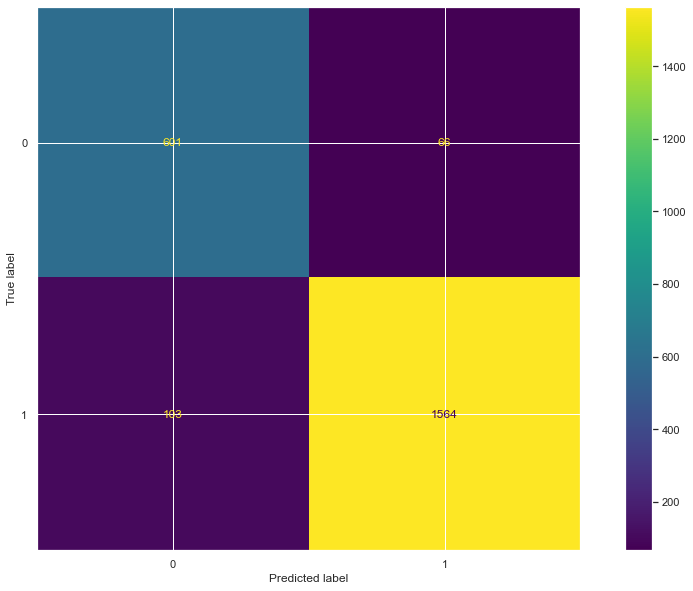

------
pre_processed_comment_text__Bayes__TFIDF


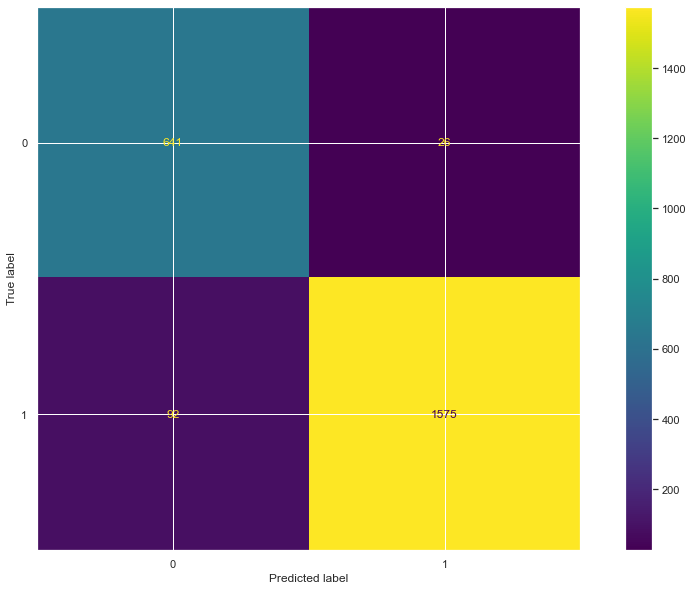

------
pre_processed_Removing StopWords__Bayes__TFIDF


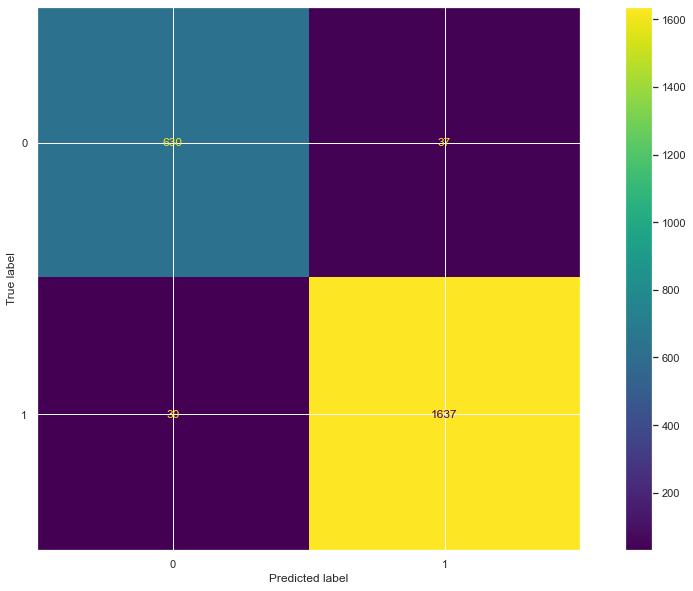

------
pre_processed_comment_text__KNN__TFIDF


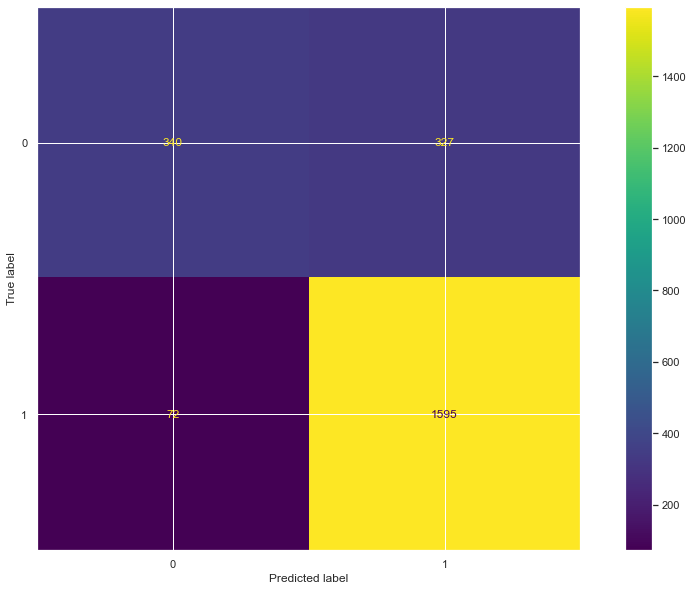

------
pre_processed_Removing StopWords - nigger__Bayes__TFIDF


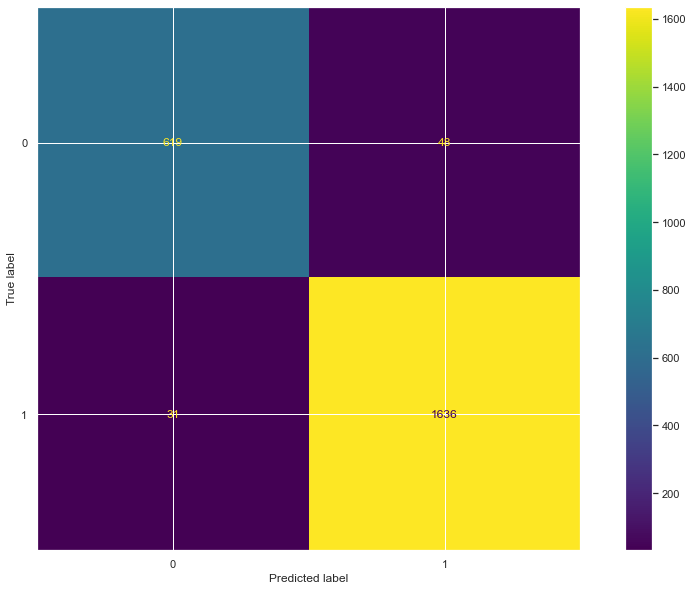

------


In [189]:
cms = {}
labels = {
    '0':'negative',
    '1':'positive'
}
for approach in best_five_approaches:
    cms[approach] = all_scores[approach]['scores']['confusion_matrix']
    print(approach)
    disp = ConfusionMatrixDisplay(confusion_matrix=cms[approach],display_labels=labels)
    disp.plot()
    plt.show()
    print('------')

> We can analyze that the model in question is practically hitting all the cases in which when it is Toxic it is classified as Toxic. However, in situations where the classification is non-toxic, the model ends up classifying it as toxic.

> Analyzing the matrix of the Knn algorithm, we can analyze that its performance was not superior to Naive Bayes. Since all other matrices result from the same Naive Bayes algorithm, we will stick with Naive Bayes with stemming and TFIDF since it is a computationally cheaper algorithm than Knn.

> # Best model pre_processed_stemming__Bayes__TFIDF


Saving model to using on script classifier and backend

In [190]:
best_model = 'pre_processed_stemming__Bayes__TFIDF'

In [193]:
src = f'C:/Users/Rícharde/Desktop/Python IA/Python-IA-Dell-Lead-/Final/models/{best_model}.pkl'
dst = f'C:/Users/Rícharde/Desktop/Python IA/Python-IA-Dell-Lead-/Final/Best_model'

In [194]:
import shutil
shutil.copy2(src,dst)

'C:/Users/Rícharde/Desktop/Python IA/Python-IA-Dell-Lead-/Final/Best_model\\pre_processed_stemming__Bayes__TFIDF.pkl'